In [ ]:
import numpy as np
import cv2
import pandas as pd
import os
import pickle
from google.colab.patches import cv2_imshow

# Face Detection Model
- Load the models

In [ ]:
face_detection_model = './models/res10_300x300_ssd_iter_140000.caffemodel'
face_detection_proto = './models/deploy.prototxt.txt'
face_descriptor = './models/openface.nn4.small2.v1.t7'

detector_model = cv2.dnn.readNetFromCaffe(face_detection_proto,face_detection_model)
descriptor_model = cv2.dnn.readNetFromTorch(face_descriptor)

In [ ]:
!ls images

'Aamir Khan'	     'Elon Musk'	  'Roger Federer'
'Angelina Jolie'     'Joe Biden'	  'Sachin Tendulkar'
'Barack Obama'	     'Leonardo DiCaprio'  'Salman Khan'
'Cristiano Ronaldo'  'Lionel Messi'	  'Scarlett Johansson'
'Donald Trump'	     'Robert Downey Jr'   'Tom Curise'


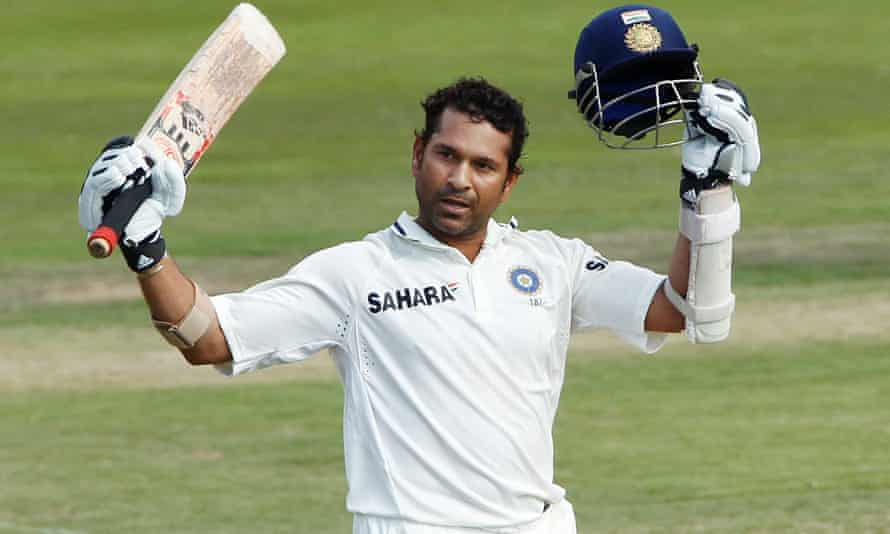

In [ ]:
# consider sample image
img = cv2.imread('./images/Sachin Tendulkar/2200.jpg')
cv2_imshow(img)

In [ ]:
def helper(image_path):
    img = cv2.imread(image_path)
    # step-1: face detection
    image = img.copy()
    h,w = image.shape[:2]
    img_blob = cv2.dnn.blobFromImage(image,1,(300,300),(104,177,123),swapRB=False,crop=False)
    # set the input
    detector_model.setInput(img_blob)
    detections = detector_model.forward()

    if len(detections) > 0:
        i = np.argmax(detections[0,0,:,2])# consider the face with max confidence score
        confidence = detections[0,0,i,2]
        if confidence > 0.5:
            box = detections[0,0,i,3:7]*np.array([w,h,w,h])
            (startx,starty,endx,endy) = box.astype('int')
            # step-2: Feature Extraction or Embedding
            roi = image[starty:endy,startx:endx].copy()
            # get the face descriptors
            faceblob = cv2.dnn.blobFromImage(roi,1/255,(96,96),(0,0,0),swapRB=True,crop=True)
            descriptor_model.setInput(faceblob)
            vectors = descriptor_model.forward()
            
            return vectors
    return None


Apply helper function to all images and get face descriptors

In [ ]:
data = dict(data=[],label=[])

In [ ]:
folders = os.listdir('images')
for folder in folders:
    filenames = os.listdir('images/{}'.format(folder))
    for filename in filenames:
        try:
            vector = helper('./images/{}/{}'.format(folder,filename))
            if vector is not None:
                data['data'].append(vector)
                data['label'].append(folder)
                print('Feature Extracted Sucessfully')
                
        except:
            pass

Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Ex

In [ ]:
data.keys()

dict_keys(['data', 'label'])

In [ ]:
pd.Series(data['label']).value_counts()

Robert Downey Jr      125
Donald Trump          122
Barack Obama          122
Scarlett Johansson    119
Elon Musk             117
Lionel Messi          114
Roger Federer         111
Cristiano Ronaldo     109
Salman Khan           107
Sachin Tendulkar      107
Leonardo DiCaprio     106
Aamir Khan            103
Angelina Jolie         98
Joe Biden              98
Tom Curise             96
dtype: int64

In [ ]:
# save the data
pickle.dump(data,open('data_face_features.pickle',mode='wb'))